<a href="https://colab.research.google.com/github/rdgnoleto/DIO/blob/main/Matriz_da_Confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow

In [ ]:
from tensorflow.keras import  datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
logdir = 'log'
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2,3 ,4, 5, 6, 7, 8, 9]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.8900 - loss: 0.3465 - val_accuracy: 0.9850 - val_loss: 0.0476
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 39ms/step - accuracy: 0.9849 - loss: 0.0473 - val_accuracy: 0.9868 - val_loss: 0.0409
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.9896 - loss: 0.0312 - val_accuracy: 0.9884 - val_loss: 0.0360
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 32ms/step - accuracy: 0.9922 - loss: 0.0227 - val_accuracy: 0.9898 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9940 - loss: 0.0184 - val_accuracy: 0.9916 - val_loss: 0.0290


In [ ]:
y_true = test_labels
y_prob = model.predict(test_images)
y_pred = np.argmax(y_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

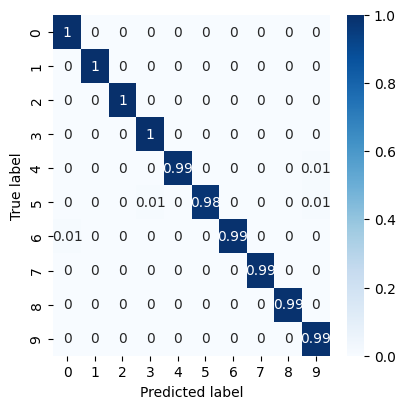

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index=classes,
                          columns=classes)

figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Desafio proposto:

• gerar cálculo da sensibilidade

• gerar cálculo da acurácia

• gerar cálculo do f-score

• gerar a curva de ROC

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Número de classes
num_classes = cm.shape[0]

# Inicializar listas para as métricas
sensibilidade = []
precisao = []
f1 = []

# Loop para cada classe
for i in range(num_classes):
    VP = cm[i, i]
    FP = cm[:, i].sum() - VP
    FN = cm[i, :].sum() - VP
    VN = cm.sum() - (VP + FP + FN)

    sens = VP / (VP + FN) if (VP + FN) != 0 else 0
    prec = VP / (VP + FP) if (VP + FP) != 0 else 0
    f1_score_ = 2 * (prec * sens) / (prec + sens) if (prec + sens) != 0 else 0

    sensibilidade.append(sens)
    precisao.append(prec)
    f1.append(f1_score_)

# Acurácia global
acuracia = accuracy_score(y_true, y_pred)

print("Sensibilidade por classe:", np.round(sensibilidade, 2))
print("Precisão por classe:", np.round(precisao, 2))
print("F1-Score por classe:", np.round(f1, 2))
print("Acurácia global:", np.round(acuracia, 2))

Sensibilidade por classe: [1.   1.   1.   1.   0.99 0.98 0.99 0.99 0.99 0.99]
Precisão por classe: [0.99 0.99 0.99 0.99 0.99 1.   1.   0.99 1.   0.98]
F1-Score por classe: [0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99]
Acurácia global: 0.99


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


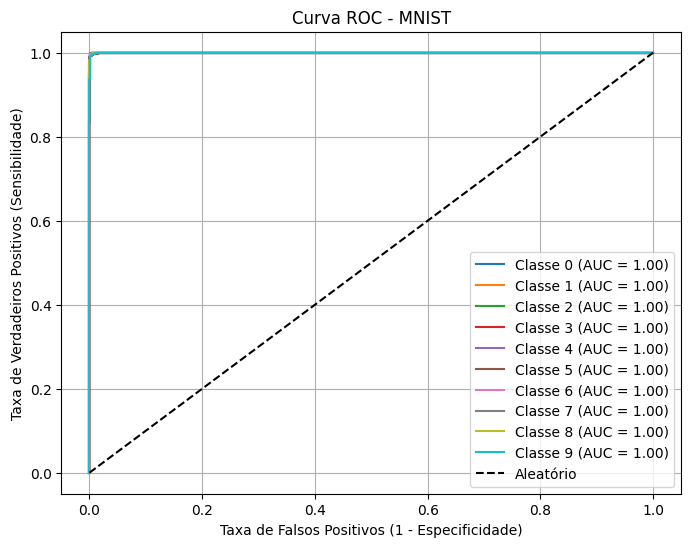

In [ ]:
# Binarizar os rótulos para multiclasse
y_true_bin = label_binarize(y_true, classes=classes)
y_pred_prob = model.predict(test_images)

# Plotar a curva ROC para cada classe
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC - MNIST')
plt.legend(loc='lower right')
plt.grid()
plt.show()